In [1]:
import os
print(os.getcwd())

C:\Users\Mr.GGLS


In [5]:
import pandas as pd
df_women = pd.read_csv('women.csv',index_col=0)
print(df_women.head())

   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


In [7]:
df_women.shape

(15, 2)

In [8]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  15 non-null     int64
 1   weight  15 non-null     int64
dtypes: int64(2)
memory usage: 360.0 bytes


In [14]:
print(df_women.columns)

Index(['height', 'weight'], dtype='object')


In [16]:
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


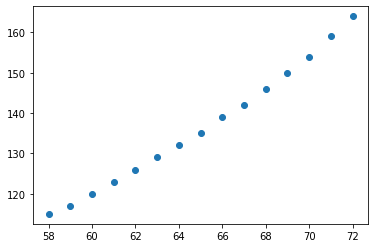

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df_women["height"],df_women["weight"])
plt.show()

In [19]:
X=df_women["height"]
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [22]:
y=df_women["weight"]
y

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: weight, dtype: int64

In [24]:
import statsmodels.api as sm
X=sm.add_constant(X)
X

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [26]:
myModel=sm.OLS(y,X)
results=myModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.09e-14
Time:                        23:31:30   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

D:\MyAnaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [27]:
results.params

const    -87.516667
height     3.450000
dtype: float64

In [28]:
results.resid.std()

1.469531833450306

In [29]:
results.conf_int(alpha=0.025)

,0,1
const,-102.552796,-72.480538
height,3.219184,3.680816


In [32]:
print("rsquared=",results.rsquared)

rsquared= 0.9910098326857505


In [33]:
results.tvalues

const    -14.741029
height    37.855307
dtype: float64

In [34]:
results.f_pvalue

1.0909729585997859e-14

In [35]:
sm.stats.stattools.durbin_watson(results.resid)

0.3153803748621806

In [36]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

In [45]:
plt.rcParams['font.family']='courier-new'
plt.plot(df_women["height"],df_women["weight"],"o")
plt.plot(df_women["height"],y_predict)
plt.title('女性体重与身高的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')

NameError: name 'df_women' is not defined

In [40]:
import numpy as np
myModel_updated=sm.OLS(y,X+np.power(X,2)+np.power(X,3))
results_updated=myModel_updated.fit()
print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8021.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.57e-19
Time:                        23:39:24   Log-Likelihood:                -13.680
No. Observations:                  15   AIC:                             31.36
Df Residuals:                      13   BIC:                             32.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2178      0.289     70.056      0.0

D:\MyAnaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [41]:
print('Params',results_updated.params)

Params const     20.217758
height     0.000269
dtype: float64


In [43]:
y_predict_updated=results_updated.predict()
y_predict_updated

array([114.10651527, 116.90256998, 119.79447404, 122.78384288,
       125.87229194, 129.06143667, 132.3528925 , 135.74827487,
       139.24919922, 142.85728098, 146.5741356 , 150.40137852,
       154.34062516, 158.39349098, 162.5615914 ])

Text(0, 0.5, '体重')

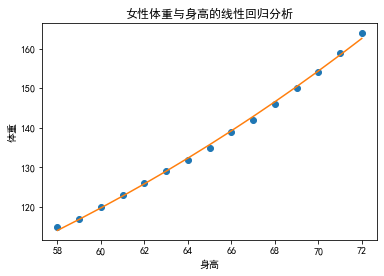

In [44]:
plt.plot(df_women["height"],df_women["weight"],"o")
plt.plot(df_women["height"],y_predict_updated)
plt.title('女性体重与身高的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')

D:\MyAnaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\MyAnaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


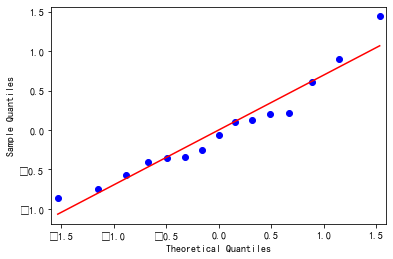

In [45]:
myQplot=sm.qqplot(results_updated.resid,line='r')

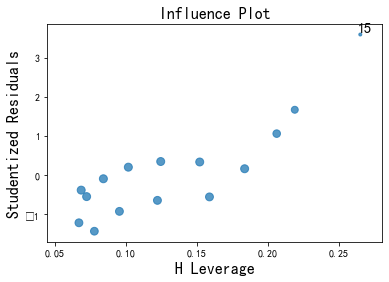

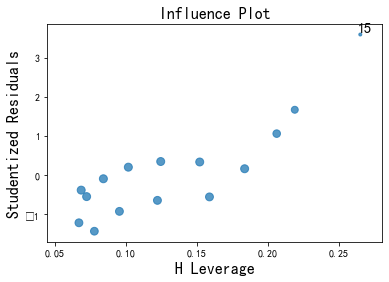

In [46]:
sm.graphics.influence_plot(results_updated,size=3)

In [25]:
import pandas as pd
import numpy as np
import os
bc_data=pd.read_csv('bc_data.csv',header=0)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
bc_data.shape

(569, 32)

In [4]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_see', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
bc_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data=bc_data.drop(['id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X_data=data.drop(['diagnosis'],axis=1)
X_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y_data=np.ravel(data['diagnosis'])
y_data[0:6]

array(['M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
X_trainSet,X_testSet,y_trainSet,y_testSet=train_test_split(X_data,y_data,random_state=1)
X_trainSet.shape

(426, 30)

In [19]:
X_testSet.shape

(143, 30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
myModel=KNeighborsClassifier(algorithm='kd_tree')
myModel.fit(X_trainSet,y_trainSet)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_predict=myModel.predict(X_testSet)
y_predict

array(['M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B'],
      dtype=object)

In [23]:
y_testSet

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B'],
      dtype=object)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_testSet)

0.9370629370629371

In [27]:
protein=pd.read_table('protein.txt',sep='\t')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [29]:
protein.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [30]:
protein.columns

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')

In [31]:
protein.shape

(25, 10)

In [32]:
protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    25 non-null     object 
 1   RedMeat    25 non-null     float64
 2   WhiteMeat  25 non-null     float64
 3   Eggs       25 non-null     float64
 4   Milk       25 non-null     float64
 5   Fish       25 non-null     float64
 6   Cereals    25 non-null     float64
 7   Starch     25 non-null     float64
 8   Nuts       25 non-null     float64
 9   Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [34]:
sprotein=protein.drop(['Country'],axis=1)
sprotein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [37]:
from sklearn import preprocessing
sprotein_scaled=preprocessing.scale(sprotein)
sprotein_scaled

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [40]:
from sklearn.cluster import KMeans
NumberOfClusters=range(1,20)
kmeans=[KMeans(n_clusters=i)for i in NumberOfClusters]
score=[kmeans[i].fit(sprotein_scaled).score(sprotein_scaled)for i in range(len(kmeans))]
score

[-225.00000000000003,
 -139.5073704483181,
 -110.8718664575071,
 -91.68971492063511,
 -76.43060222648339,
 -62.11420684088031,
 -55.35065165242816,
 -46.14848750402004,
 -40.29847469361965,
 -34.908933374422716,
 -31.516218916831562,
 -25.874556150450708,
 -22.556617687216907,
 -19.323078192514725,
 -16.00513972928092,
 -13.747299804086335,
 -10.995301496930022,
 -8.61897844282252,
 -6.7041060086011095]

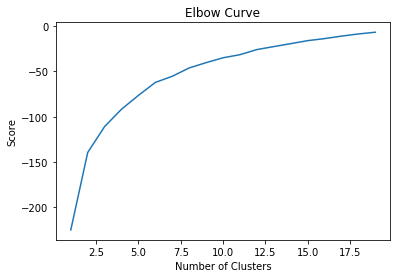

In [47]:
import matplotlib.pyplot as plt
plt.plot(NumberOfClusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [48]:
myKmeans=KMeans(algorithm="auto",n_clusters=5,n_init=10,max_iter=200)

In [50]:
myKmeans.fit(sprotein_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
y_kmeans=myKmeans.predict(sprotein)
y_kmeans

array([0, 4, 4, 0, 2, 4, 4, 1, 4, 0, 0, 4, 0, 4, 1, 2, 3, 0, 3, 1, 4, 4,
       0, 4, 0])

In [63]:
def print_kmcluster(k):
    for i in range (k):
        print('Cluster',i)
        ls=[]
        for index,value in enumerate(y_kmeans):
            if i==value:
                ls.append(index)
                print(protein.loc[ls,['Country','RedMeat','Fish','Fr&Veg']])
print_kmcluster(5)

Cluster 0
   Country  RedMeat  Fish  Fr&Veg
0  Albania     10.1   0.2     1.7
    Country  RedMeat  Fish  Fr&Veg
0   Albania     10.1   0.2     1.7
3  Bulgaria      7.8   1.2     4.2
    Country  RedMeat  Fish  Fr&Veg
0   Albania     10.1   0.2     1.7
3  Bulgaria      7.8   1.2     4.2
9    Greece     10.2   5.9     6.5
     Country  RedMeat  Fish  Fr&Veg
0    Albania     10.1   0.2     1.7
3   Bulgaria      7.8   1.2     4.2
9     Greece     10.2   5.9     6.5
10   Hungary      5.3   0.3     4.2
     Country  RedMeat  Fish  Fr&Veg
0    Albania     10.1   0.2     1.7
3   Bulgaria      7.8   1.2     4.2
9     Greece     10.2   5.9     6.5
10   Hungary      5.3   0.3     4.2
12     Italy      9.0   3.4     6.7
     Country  RedMeat  Fish  Fr&Veg
0    Albania     10.1   0.2     1.7
3   Bulgaria      7.8   1.2     4.2
9     Greece     10.2   5.9     6.5
10   Hungary      5.3   0.3     4.2
12     Italy      9.0   3.4     6.7
17   Romania      6.2   1.0     2.8
     Country  RedMeat  Fish  

In [64]:
from pyspark.sql import SparkSession

In [68]:
dir(SparkSession)

['Builder',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSession',
 '_convert_from_pandas',
 '_createFromLocal',
 '_createFromRDD',
 '_create_dataframe',
 '_create_from_pandas_with_arrow',
 '_create_shell_session',
 '_get_numpy_record_dtype',
 '_inferSchema',
 '_inferSchemaFromList',
 '_instantiatedSession',
 '_repr_html_',
 'builder',
 'catalog',
 'conf',
 'createDataFrame',
 'getActiveSession',
 'newSession',
 'range',
 'read',
 'readStream',
 'sparkContext',
 'sql',
 'stop',
 'streams',
 'table',
 'udf',
 'version']

In [76]:
SparkSession.__doc__

'The entry point to programming Spark with the Dataset and DataFrame API.\n\n    A SparkSession can be used create :class:`DataFrame`, register :class:`DataFrame` as\n    tables, execute SQL over tables, cache tables, and read parquet files.\n    To create a SparkSession, use the following builder pattern:\n\n    .. autoattribute:: builder\n       :annotation:\n\n    Examples\n    --------\n    >>> spark = SparkSession.builder \\\n    ...     .master("local") \\\n    ...     .appName("Word Count") \\\n    ...     .config("spark.some.config.option", "some-value") \\\n    ...     .getOrCreate()\n\n    >>> from datetime import datetime\n    >>> from pyspark.sql import Row\n    >>> spark = SparkSession(sc)\n    >>> allTypes = sc.parallelize([Row(i=1, s="string", d=1.0, l=1,\n    ...     b=True, list=[1, 2, 3], dict={"s": 0}, row=Row(a=1),\n    ...     time=datetime(2014, 8, 1, 14, 1, 5))])\n    >>> df = allTypes.toDF()\n    >>> df.createOrReplaceTempView("allTypes")\n    >>> spark.sql(\'se

In [77]:
mySpark=SparkSession.builder\
.appName('My_App')\
.master('local')\
.getOrCreate()

In [79]:
mySpark

In [80]:
myDF=mySpark.range(1,100).toDF("number")

In [81]:
myDF

DataFrame[number: bigint]

In [82]:
myDF.printSchema()

root
 |-- number: long (nullable = false)



In [83]:
divisBy2=myDF.where("number%2==0")
divisBy2

DataFrame[number: bigint]

In [84]:
divisBy2.count()

49

In [85]:
myDF.take(5)

[Row(number=1), Row(number=2), Row(number=3), Row(number=4), Row(number=5)]

In [86]:
myDF=mySpark.range(1,100).toDF("number").where("number%2==0").sort("number")
myDF

DataFrame[number: bigint]

In [87]:
myDF=mySpark.range(100,1).toDF("number").where("number%2==0").filter("number%5=0").sort("number").explain()

== Physical Plan ==
*(2) Sort [number#16L ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(number#16L ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [id=#49]
   +- *(1) Project [id#14L AS number#16L]
      +- *(1) Filter (((id#14L % 2) = 0) AND ((id#14L % 5) = 0))
         +- *(1) Range (100, 1, step=1, splits=1)




In [89]:
df=mySpark.read.csv("flights.csv",header=True)

In [90]:
df.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- cancelled: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- min: string (nullable = true)



In [91]:
df.cache()

DataFrame[year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, cancelled: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, min: string]

In [124]:
df.show(5)

+----+-----+---+--------+---------+--------+---------+---------+-------+-------+------+------+----+--------+--------+----+---+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|cancelled|carrier|tailnum|flight|origin|dest|air_time|distance|hour|min|
+----+-----+---+--------+---------+--------+---------+---------+-------+-------+------+------+----+--------+--------+----+---+
|2014|    1|  1|     914|       14|    1238|       13|        0|     AA| N338AA|     1|   JFK| LAX|     359|    2475|   9| 14|
|2014|    1|  1|    1157|       -3|    1523|       13|        0|     AA| N335AA|     3|   JFK| LAX|     363|    2475|  11| 57|
|2014|    1|  1|    1902|        2|    2224|        9|        0|     AA| N327AA|    21|   JFK| LAX|     351|    2475|  19|  2|
|2014|    1|  1|     722|       -8|    1014|      -26|        0|     AA| N3EHAA|    29|   LGA| PBI|     157|    1035|   7| 22|
|2014|    1|  1|    1347|        2|    1706|        1|        0|     AA| N319AA|   117|   JFK| LAX|     350|   

In [93]:
df.columns

['year',
 'month',
 'day',
 'dep_time',
 'dep_delay',
 'arr_time',
 'arr_delay',
 'cancelled',
 'carrier',
 'tailnum',
 'flight',
 'origin',
 'dest',
 'air_time',
 'distance',
 'hour',
 'min']

In [94]:
df.count()

253316

In [97]:
spark_df_flights_selected=df.select(df['tailnum'],df['flight'],df['dest'],df['arr_delay'],df['dep_delay'])

In [98]:
spark_df_flights_selected.show(4)

+-------+------+----+---------+---------+
|tailnum|flight|dest|arr_delay|dep_delay|
+-------+------+----+---------+---------+
| N338AA|     1| LAX|       13|       14|
| N335AA|     3| LAX|       13|       -3|
| N327AA|    21| LAX|        9|        2|
| N3EHAA|    29| PBI|      -26|       -8|
+-------+------+----+---------+---------+
only showing top 4 rows



In [115]:
df.createTempView('flights_view')

AnalysisException: Temporary view 'flights_view' already exists

In [116]:
sql_str='select dest, arr_delay from flights_view'

In [117]:
spark_destDF=mySpark.sql(sql_str)

In [118]:
spark_destDF.show(4)

+----+---------+
|dest|arr_delay|
+----+---------+
| LAX|       13|
| LAX|       13|
| LAX|        9|
| PBI|      -26|
+----+---------+
only showing top 4 rows



In [122]:
import tempfile
tempfile.mkdtemp()

'C:\\Users\\Mr.GGLS\\AppData\\Local\\Temp\\tmp5nl_feqn'

In [125]:
jfkDF=df.filter(df['dest']=='LAX')
jfkDF.show(3)

+----+-----+---+--------+---------+--------+---------+---------+-------+-------+------+------+----+--------+--------+----+---+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|cancelled|carrier|tailnum|flight|origin|dest|air_time|distance|hour|min|
+----+-----+---+--------+---------+--------+---------+---------+-------+-------+------+------+----+--------+--------+----+---+
|2014|    1|  1|     914|       14|    1238|       13|        0|     AA| N338AA|     1|   JFK| LAX|     359|    2475|   9| 14|
|2014|    1|  1|    1157|       -3|    1523|       13|        0|     AA| N335AA|     3|   JFK| LAX|     363|    2475|  11| 57|
|2014|    1|  1|    1902|        2|    2224|        9|        0|     AA| N327AA|    21|   JFK| LAX|     351|    2475|  19|  2|
+----+-----+---+--------+---------+--------+---------+---------+-------+-------+------+------+----+--------+--------+----+---+
only showing top 3 rows



In [126]:
dailyDelayDF=df.groupBy(df.day)\
.agg({'dep_delay':'mean','arr_delay':'mean'})

In [128]:
dailyDelayDF.show()

+---+------------------+------------------+
|day|    avg(arr_delay)|    avg(dep_delay)|
+---+------------------+------------------+
|  7| 5.585851487467791|10.261302412743031|
| 15|18.746231468792825|21.212034383954155|
| 11|6.0451480857211655| 9.553094148808091|
| 29| 2.255858872006181| 8.261395827968066|
|  3|26.207990115321252| 26.92133443163097|
| 30| 6.208669617287165|12.337151783389743|
|  8|10.411722402013664|12.527148507731033|
| 22|  9.18939207482156|14.091681023873985|
| 28| 2.851545444099736|   8.8361484545559|
| 16| 13.15444379046498|  16.3605650382578|
|  5|14.650797768841613| 16.96964586846543|
| 31|1.7681744749596122|  9.21829563812601|
| 18| 3.153955471340597| 8.220511605873993|
| 27| 5.445713626398985|  9.61024575977847|
| 17|  3.00079131810988| 8.277639611123671|
| 26|3.3071488444497663| 9.248113998323554|
|  6| 9.741471532152621|11.197907999524546|
| 19|1.0095440084835632|  8.66890538470602|
| 23| 9.836469900642898|13.556399766218586|
| 25|1.7482355804331955| 8.47213

In [135]:
dailyDelayDF

NameError: name 'length' is not defined

In [136]:
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg(arr_delay): double (nullable = true)
 |-- avg(dep_delay): double (nullable = true)



In [137]:
dailyDelayDF=dailyDelayDF.withColumnRenamed('avg(arr_delay)','avg_arr_delay')
dailyDelayDF=dailyDelayDF.withColumnRenamed('avg(dep_delay)','avg_dep_delay')
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg_arr_delay: double (nullable = true)
 |-- avg_dep_delay: double (nullable = true)



In [138]:
local_dailyDelay=dailyDelayDF.toPandas()

In [140]:
local_dailyDelay.head(10)

,day,avg_arr_delay,avg_dep_delay
0,7,5.585851,10.261302
1,15,18.746231,21.212034
2,11,6.045148,9.553094
3,29,2.255859,8.261396
4,3,26.207990,26.921334
5,30,6.208670,12.337152
6,8,10.411722,12.527149
7,22,9.189392,14.091681
8,28,2.851545,8.836148
9,16,13.154444,16.360565


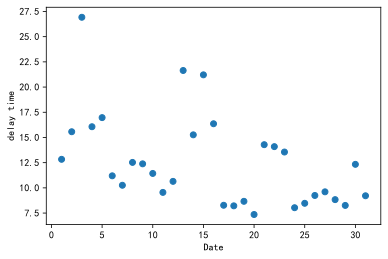

In [211]:
import matplotlib.pyplot as plt
plt.scatter(local_dailyDelay.day.values.astype('i8'),
           local_dailyDelay.avg_dep_delay.astype('f8'))
plt.rcParams['font.family']='simHei'
plt.xlabel('Date')
plt.ylabel('delay time')
plt.show()

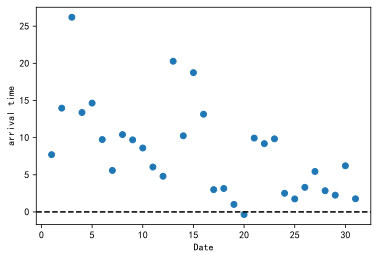

In [212]:
plt.scatter(local_dailyDelay.day.values.astype('i8'),
           local_dailyDelay.avg_arr_delay.values.astype('f8'))
plt.xlabel('Date')
plt.ylabel('arrival time')
plt.axhline(0,color='black',linestyle='--',alpha=1)

In [158]:
mySpark.stop()

In [160]:
PCF=pd.read_csv('P00000001-ALL.csv',index_col=False,infer_datetime_format=True,parse_dates=["contb_receipt_dt"])

D:\MyAnaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [161]:
PCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   cmte_id            1001731 non-null  object        
 1   cand_id            1001731 non-null  object        
 2   cand_nm            1001731 non-null  object        
 3   contbr_nm          1001731 non-null  object        
 4   contbr_city        1001712 non-null  object        
 5   contbr_st          1001727 non-null  object        
 6   contbr_zip         1001620 non-null  object        
 7   contbr_employer    988002 non-null   object        
 8   contbr_occupation  993301 non-null   object        
 9   contb_receipt_amt  1001731 non-null  float64       
 10  contb_receipt_dt   1001731 non-null  datetime64[ns]
 11  receipt_desc       14166 non-null    object        
 12  memo_cd            92482 non-null    object        
 13  memo_text          97770 no

In [162]:
PCF.shape

(1001731, 16)

In [163]:
PCF.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [165]:
PCF=PCF.drop(['form_tp','memo_cd','memo_text','receipt_desc','contbr_nm'],axis=1)

In [167]:
PCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   cmte_id            1001731 non-null  object        
 1   cand_id            1001731 non-null  object        
 2   cand_nm            1001731 non-null  object        
 3   contbr_city        1001712 non-null  object        
 4   contbr_st          1001727 non-null  object        
 5   contbr_zip         1001620 non-null  object        
 6   contbr_employer    988002 non-null   object        
 7   contbr_occupation  993301 non-null   object        
 8   contb_receipt_amt  1001731 non-null  float64       
 9   contb_receipt_dt   1001731 non-null  datetime64[ns]
 10  file_num           1001731 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 84.1+ MB


In [168]:
PCF.head()

,cmte_id,cand_id,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,file_num
0,C00410118,P20002978,"Bachmann, Michelle",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-06-20,736166
1,C00410118,P20002978,"Bachmann, Michelle",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-06-23,736166
2,C00410118,P20002978,"Bachmann, Michelle",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,749073
3,C00410118,P20002978,"Bachmann, Michelle",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-08-01,749073
4,C00410118,P20002978,"Bachmann, Michelle",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-06-20,736166


In [169]:
PCF.to_csv("PCF.csv")

In [172]:
os.getcwd()

'C:\\Users\\Mr.GGLS'

In [173]:
PCF=pd.read_csv('PCF.csv',header=0,infer_datetime_format=True,parse_dates=["contb_receipt_dt"])

D:\MyAnaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [174]:
PCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Unnamed: 0         1001731 non-null  int64         
 1   cmte_id            1001731 non-null  object        
 2   cand_id            1001731 non-null  object        
 3   cand_nm            1001731 non-null  object        
 4   contbr_city        1001712 non-null  object        
 5   contbr_st          1001727 non-null  object        
 6   contbr_zip         1001620 non-null  object        
 7   contbr_employer    988002 non-null   object        
 8   contbr_occupation  993301 non-null   object        
 9   contb_receipt_amt  1001731 non-null  float64       
 10  contb_receipt_dt   1001731 non-null  datetime64[ns]
 11  file_num           1001731 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 91.7+ MB


In [176]:
PCF.shape

(1001731, 12)

In [177]:
PCF.head()

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,file_num
0,0,C00410118,P20002978,"Bachmann, Michelle",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-06-20,736166
1,1,C00410118,P20002978,"Bachmann, Michelle",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-06-23,736166
2,2,C00410118,P20002978,"Bachmann, Michelle",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,749073
3,3,C00410118,P20002978,"Bachmann, Michelle",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-08-01,749073
4,4,C00410118,P20002978,"Bachmann, Michelle",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-06-20,736166


In [178]:
PCF.describe()

,Unnamed: 0,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06,1.001731e+06
mean,5.008650e+05,2.982352e+02,7.744948e+05
std,2.891750e+05,3.749667e+03,1.059822e+04
min,0.000000e+00,-3.080000e+04,7.235110e+05
25%,2.504325e+05,3.500000e+01,7.719270e+05
50%,5.008650e+05,1.000000e+02,7.792250e+05
75%,7.512975e+05,2.500000e+02,7.802340e+05
max,1.001730e+06,2.014491e+06,7.878030e+05


In [180]:
PCF.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [181]:
PCF.cand_nm.unique().shape

(13,)

In [183]:
len(PCF.cand_nm.unique())

13

In [184]:
PCF.iloc[100000]

Unnamed: 0                        100000
cmte_id                        C00431171
cand_id                        P80003353
cand_nm                     Romney, Mitt
contbr_city                   ALEXANDRIA
contbr_st                             VA
contbr_zip                     223121161
contbr_employer             N.L.A. PIPER
contbr_occupation               ATTORNEY
contb_receipt_amt                   2500
contb_receipt_dt     2011-10-31 00:00:00
file_num                          771927
Name: 100000, dtype: object

In [185]:
unique_cands=PCF.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [186]:
PCF_ObamaAndRomney=PCF[PCF.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
PCF_ObamaAndRomney.head(2)

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,file_num
411,411,C00431171,P80003353,"Romney, Mitt",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02-01,780124
412,412,C00431171,P80003353,"Romney, Mitt",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02-01,780124


In [187]:
PCF_ObamaAndRomney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700975 entries, 411 to 701385
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         700975 non-null  int64         
 1   cmte_id            700975 non-null  object        
 2   cand_id            700975 non-null  object        
 3   cand_nm            700975 non-null  object        
 4   contbr_city        700968 non-null  object        
 5   contbr_st          700971 non-null  object        
 6   contbr_zip         700922 non-null  object        
 7   contbr_employer    695594 non-null  object        
 8   contbr_occupation  695510 non-null  object        
 9   contb_receipt_amt  700975 non-null  float64       
 10  contb_receipt_dt   700975 non-null  datetime64[ns]
 11  file_num           700975 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 69.5+ MB


In [188]:
PCF_ObamaAndRomney.cand_nm.value_counts()

Obama, Barack    593746
Romney, Mitt     107229
Name: cand_nm, dtype: int64

In [189]:
parties={'Obama, Barack':'Democrat','Romney, Mitt':'Republican'}

In [190]:
PCF_ObamaAndRomney['party']=PCF_ObamaAndRomney.cand_nm.map(parties)
PCF_ObamaAndRomney['party'].value_counts()

D:\MyAnaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Democrat      593746
Republican    107229
Name: party, dtype: int64

In [191]:
PCF_ObamaAndRomney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700975 entries, 411 to 701385
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         700975 non-null  int64         
 1   cmte_id            700975 non-null  object        
 2   cand_id            700975 non-null  object        
 3   cand_nm            700975 non-null  object        
 4   contbr_city        700968 non-null  object        
 5   contbr_st          700971 non-null  object        
 6   contbr_zip         700922 non-null  object        
 7   contbr_employer    695594 non-null  object        
 8   contbr_occupation  695510 non-null  object        
 9   contb_receipt_amt  700975 non-null  float64       
 10  contb_receipt_dt   700975 non-null  datetime64[ns]
 11  file_num           700975 non-null  int64         
 12  party              700975 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2)

In [192]:
PCF_ObamaAndRomney[PCF_ObamaAndRomney.contb_receipt_amt<0][:2]

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,file_num,party
752,752,C00431171,P80003353,"Romney, Mitt",MERIDIANVILLE,AL,35759,NaN,NaN,-60.0,2012-03-07,780128,Republican
885,885,C00431171,P80003353,"Romney, Mitt",MOUNTAIN BRK,AL,3.52132e+08,RETIRED,RETIRED,-150.0,2012-02-06,780124,Republican


In [195]:
(PCF_ObamaAndRomney.contb_receipt_amt>0).value_counts()

True     694282
False      6693
Name: contb_receipt_amt, dtype: int64

In [196]:
type(PCF_ObamaAndRomney.contb_receipt_amt)

pandas.core.series.Series

In [198]:
PCF_ObamaAndRomney.contbr_occupation.unique().shape

(33606,)

In [200]:
PCF_ObamaAndRomney.contbr_occupation.value_counts()

RETIRED                          177897
ATTORNEY                          30219
INFORMATION REQUESTED             24785
HOMEMAKER                         19742
PHYSICIAN                         17259
                                  ...  
SECURITIES/INSURANCE BROKER           1
DIRECTOR OF PRODUCT MARKETING         1
DIRECTOR OF DATA CENTERS              1
OCCUPATIONAL HEALTH NURSE             1
TELEVISION/MOVIE WRITER               1
Name: contbr_occupation, Length: 33605, dtype: int64

In [201]:
occ_mapping={
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
    'C.E.O.':'CEO'
}
f=lambda x:occ_mapping.get(x,x)
PCF_ObamaAndRomney.contbr_occupation=PCF_ObamaAndRomney.contbr_occupation.map(f)

D:\MyAnaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [203]:
emp_mapping={
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED',
}
f=lambda x:emp_mapping.get(x,x)
PCF_ObamaAndRomney.contbr_employer=PCF_ObamaAndRomney.contbr_employer.map(f)

In [206]:
by_occupation=PCF_ObamaAndRomney.pivot_table('contb_receipt_amt',
                                            index='contbr_occupation',
                                            columns='party',
                                            aggfunc='sum')
over_2mm=by_occupation[by_occupation.sum(1)>1000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,5302578.82
BANKER,224084.40,993536.24
BUSINESS OWNER,449979.30,601529.86
CEO,2071474.79,2247242.03
CHAIRMAN,495547.00,752587.37
CONSULTANT,2459812.71,1404576.94
ENGINEER,950425.55,317249.24
EXECUTIVE,1355161.05,2230653.79
FINANCE,294031.40,1118567.25


In [207]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

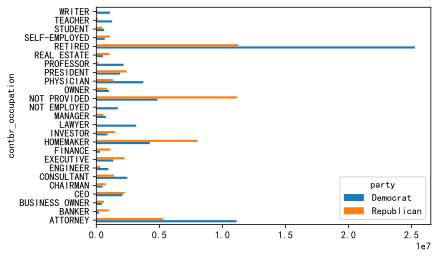

In [210]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
over_2mm.plot(kind='barh')

In [213]:
def get_top_amounts(group,key,n=3):
    totals=group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [214]:
grouped=PCF_ObamaAndRomney.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=10)
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22665902.20
               SELF-EMPLOYED         18584277.16
               NOT EMPLOYED           8584118.70
               NOT PROVIDED           5036178.37
               HOMEMAKER              2599987.04
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          11827237.12
               RETIRED               11264701.35
               HOMEMAKER              8037000.86
               SELF-EMPLOYED          7265136.53
               STUDENT                 488642.82
               CREDIT SUISSE           265650.00
               MORGAN STANLEY          262266.00
               GOLDMAN SACH & CO.      233250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [215]:
bins=np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels=pd.cut(PCF_ObamaAndRomney.contb_receipt_amt,bins)
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [216]:
grouped=PCF_ObamaAndRomney.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [218]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

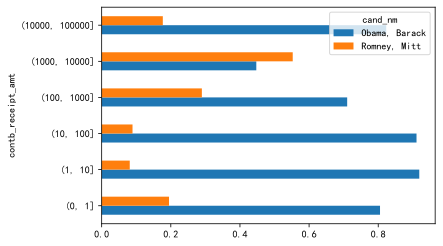

In [220]:
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)
normed_sums=bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums[:-2].plot(kind='barh')

In [222]:
Romney=PCF_ObamaAndRomney[PCF_ObamaAndRomney.cand_nm=='Romney, Mitt'].groupby("contb_receipt_dt")["contb_receipt_amt"].sum()
Obama=PCF_ObamaAndRomney[PCF_ObamaAndRomney.cand_nm=='Obama, Barack'].groupby("contb_receipt_dt")["contb_receipt_amt"].sum()

In [223]:
BothofThem=PCF_ObamaAndRomney.groupby("contb_receipt_dt")["contb_receipt_amt"].sum()

In [226]:
BothofThem.shape,Obama.shape,Romney.shape
BothofThem.index
PCF_ObamaAndRomney["contb_receipt_dt"].values
type(PCF_ObamaAndRomney["contb_receipt_dt"].values)

((393,), (393,), (386,))

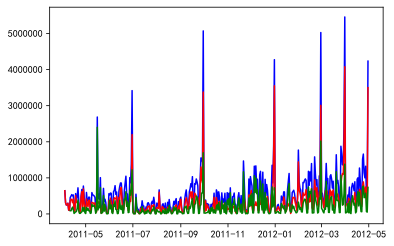

In [227]:
plt.plot(BothofThem.index,BothofThem.values,c="blue",label='Both')
plt.plot(Obama.index,Obama.values,c='red',label='Obama')
plt.plot(Romney.index,Romney.values,c='green',label='Romney')

In [228]:
import datetime as dt

In [229]:
PCF_ObamaAndRomney.contb_receipt_dt=PCF_ObamaAndRomney.contb_receipt_dt.dt.to_period('m')
PCF_ObamaAndRomney.head(2)

D:\MyAnaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,file_num,party
411,411,C00431171,P80003353,"Romney, Mitt",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,2012-02,780124,Republican
412,412,C00431171,P80003353,"Romney, Mitt",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,2012-02,780124,Republican


In [230]:
Romney=PCF_ObamaAndRomney[PCF_ObamaAndRomney.cand_nm=='Romney, Mitt'].groupby("contb_receipt_dt")["contb_receipt_amt"].sum()
Obama=PCF_ObamaAndRomney[PCF_ObamaAndRomney.cand_nm=='Obama, Barack'].groupby("contb_receipt_dt")["contb_receipt_amt"].sum()
BothofThem=PCF_ObamaAndRomney.groupby("contb_receipt_dt")["contb_receipt_amt"].sum()

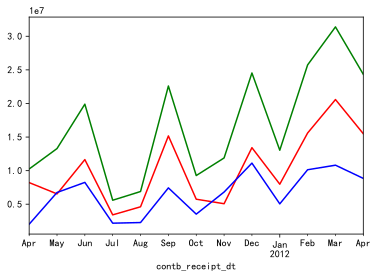

In [231]:
BothofThem.plot(color='green',label='Both')
Obama.plot(color='red',label='Obama')
Romney.plot(color='blue',label='Romney')

In [233]:
grouped=PCF_ObamaAndRomney.groupby(['cand_nm','contbr_st'])
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals=totals[totals.sum(1)>100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DC,4317865.85,999740.50
DE,325394.14,81404.00


In [235]:
percent=totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.761575,0.238425
AL,0.515802,0.484198
AR,0.755084,0.244916
AZ,0.445087,0.554913
CA,0.681780,0.318220
CO,0.587476,0.412524
CT,0.376242,0.623758
DC,0.811994,0.188006
DE,0.799891,0.200109


In [236]:
percent.to_csv("percent.csv")

In [11]:
import cartopy 
import pandas as pd
import matplotlib as mpl
from matplotlib.patches import Polygn

ModuleNotFoundError: No module named 'matplotlib.patches'